In [40]:
import warnings 
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt  

In [2]:
path = r'train.csv/train.csv'
df = pd.read_csv(path)
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
144603,144603,228811,228812,What advice would you give your 23 year old se...,What advice would you give to your 25 year old...,0
28564,28564,52950,52951,What is a suitable inpatient drug and alcohol ...,Which is a suitable inpatient drug and alcohol...,0
131391,131391,210672,96347,I have reliance jio 4g SIM. I downloaded MyJio...,Can I use a Reliance Jio 4G sim in a 3G Micros...,0
37580,37580,68365,68366,How can I download my e-Aadhaar Card?,How do I change the address on my new Aadhaar ...,0
31653,31653,58344,58345,What are some of the most common examples of a...,What are some of the most common examples of i...,1
30075,30075,55590,55591,Can I travel internationally if I have a class...,Theoretically is a minor able to avoid a charg...,0
326091,326091,452364,452365,Will I be considered too old for dating men wh...,Do beautiful men date average women?,0
282144,282144,402038,402039,Has Trump's call to shoot his opponent actuall...,Is it funny to watch Trump's opponents inadver...,0
283261,283261,403338,403339,Is Cory Booker making a mistake by testifying ...,How fair are the racism claims against Jeff Se...,0
216425,216425,322573,322574,How should one prepare for the IIFT?,How do I prepare for IIFT in only 1 month?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

In [7]:
# Distribution of duplicate and non-duplicate questions
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot:>

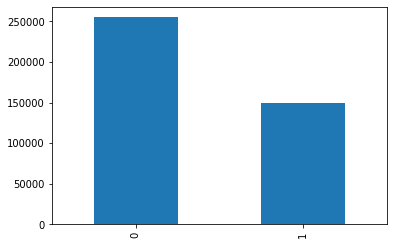

In [8]:
df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100
df['is_duplicate'].value_counts().plot(kind='bar')

In [9]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions: ', np.unique(qid).shape[0])
x = qid.value_counts() > 1 
print("Number of questions getting repeated : ", x[x].shape[0])

Number of unique questions:  537933
Number of questions getting repeated :  111780


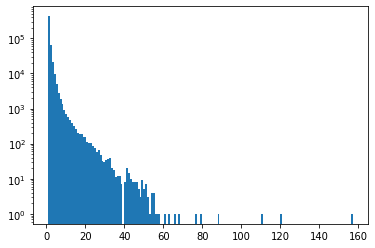

In [10]:
# Repeated questions histogram 
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [11]:
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [12]:
df['qid1'].value_counts()

8461      50
14110     48
1749      47
20628     47
25984     47
          ..
223037     1
223039     1
223041     1
223043     1
537932     1
Name: qid1, Length: 290654, dtype: int64

In [13]:
df['qid2'].value_counts()

30782     120
2559      115
4044      100
2561       71
17978      66
         ... 
221429      1
221433      1
133300      1
221437      1
537933      1
Name: qid2, Length: 299364, dtype: int64

### Bag of Words with Basic Features

In [14]:
new_df = df.sample(30000).dropna()

In [15]:
new_df.shape

(30000, 6)

In [16]:
new_df.duplicated().sum()

0

0    19167
1    10833
Name: is_duplicate, dtype: int64
0    63.89
1    36.11
Name: is_duplicate, dtype: float64


<AxesSubplot:>

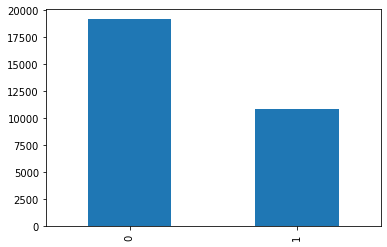

In [17]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [18]:
# Repeats 
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist()) 
print("Number of unique questions", np.unique(qid).shape[0]) 
x = qid.value_counts()> 1
print("Number of questions getting repeated", x[x].shape[0])

Number of unique questions 55685
Number of questions getting repeated 3254


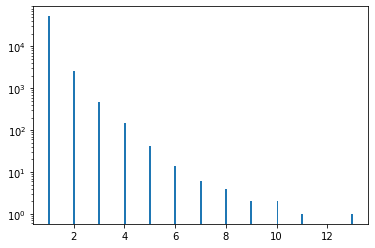

In [19]:
# Repeated questions histogram 
plt.hist(qid.value_counts().values, bins=160) 
plt.yscale('log') 
plt.show()

In [20]:
# Feature Engineering 
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
62155,62155,108393,108394,How do I get free WiFi on Android?,How can I get free wifi?,0,34,24
244172,244172,356759,338585,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?,0,47,46
150717,150717,4962,237148,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...,1,81,148
247063,247063,360219,360220,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?,0,61,39
229060,229060,338279,338280,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...,0,51,61


In [22]:
new_df['q1_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_words'] = new_df['question2'].apply(lambda row: len(row.split(" "))) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
62155,62155,108393,108394,How do I get free WiFi on Android?,How can I get free wifi?,0,34,24,8,6
244172,244172,356759,338585,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?,0,47,46,8,9
150717,150717,4962,237148,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...,1,81,148,13,26
247063,247063,360219,360220,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?,0,61,39,12,6
229060,229060,338279,338280,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...,0,51,61,8,11


In [23]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
new_df['common_words'] = new_df.apply(common_words, axis=1) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
62155,62155,108393,108394,How do I get free WiFi on Android?,How can I get free wifi?,0,34,24,8,6,4
244172,244172,356759,338585,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?,0,47,46,8,9,6
150717,150717,4962,237148,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...,1,81,148,13,26,9
247063,247063,360219,360220,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?,0,61,39,12,6,2
229060,229060,338279,338280,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...,0,51,61,8,11,5


In [25]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) 
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" "))) 
    return (len(w1) + len(w2))

In [26]:
new_df["total_words"] = new_df.apply(total_words, axis=1) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
62155,62155,108393,108394,How do I get free WiFi on Android?,How can I get free wifi?,0,34,24,8,6,4,14
244172,244172,356759,338585,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?,0,47,46,8,9,6,17
150717,150717,4962,237148,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...,1,81,148,13,26,9,35
247063,247063,360219,360220,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?,0,61,39,12,6,2,18
229060,229060,338279,338280,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...,0,51,61,8,11,5,19


In [27]:
new_df['shared_words'] = round(new_df['common_words']/new_df['total_words'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,shared_words
62155,62155,108393,108394,How do I get free WiFi on Android?,How can I get free wifi?,0,34,24,8,6,4,14,0.29
244172,244172,356759,338585,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?,0,47,46,8,9,6,17,0.35
150717,150717,4962,237148,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...,1,81,148,13,26,9,35,0.26
247063,247063,360219,360220,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?,0,61,39,12,6,2,18,0.11
229060,229060,338279,338280,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...,0,51,61,8,11,5,19,0.26


Minimum characters:  1
Maximum characters:  313
Average num of characters:  59


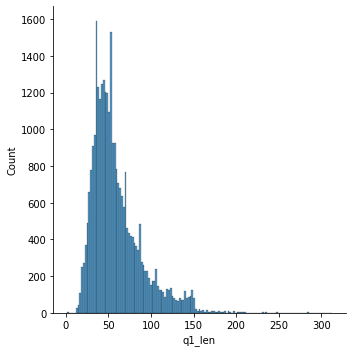

In [28]:
# Analysis of features 
sns.displot(new_df['q1_len']) 
print('Minimum characters: ', new_df['q1_len'].min()) 
print("Maximum characters: ", new_df["q1_len"].max()) 
print("Average num of characters: ", int(new_df['q1_len'].mean()))

Minimum characters:  7
Maximum characters:  726
Average num of characters:  60


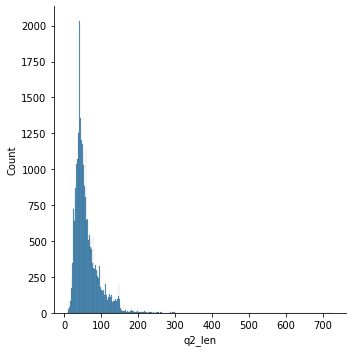

In [29]:
# Analysis of features 
sns.displot(new_df['q2_len']) 
print('Minimum characters: ', new_df['q2_len'].min()) 
print("Maximum characters: ", new_df["q2_len"].max()) 
print("Average num of characters: ", int(new_df['q2_len'].mean()))

Minimum characters:  1
Maximum characters:  64
Average num of characters:  10


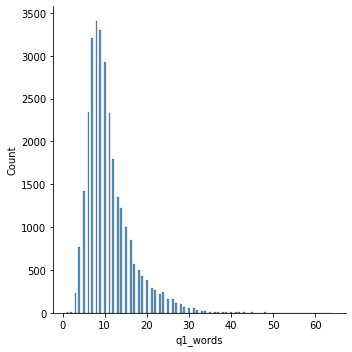

In [30]:
# Analysis of features 
sns.displot(new_df['q1_words']) 
print('Minimum characters: ', new_df['q1_words'].min()) 
print("Maximum characters: ", new_df["q1_words"].max()) 
print("Average num of characters: ", int(new_df['q1_words'].mean()))

Minimum characters:  1
Maximum characters:  127
Average num of characters:  11


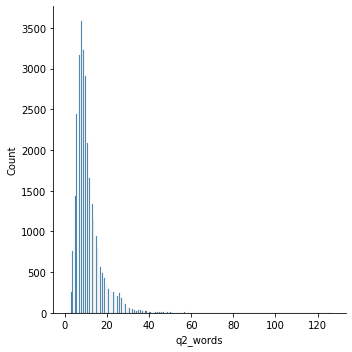

In [31]:
# Analysis of features 
sns.displot(new_df['q2_words']) 
print('Minimum characters: ', new_df['q2_words'].min()) 
print("Maximum characters: ", new_df["q2_words"].max()) 
print("Average num of characters: ", int(new_df['q2_words'].mean()))

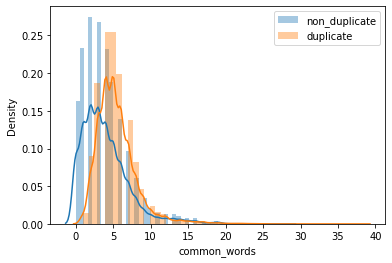

In [41]:
# Common words 
sns.distplot(new_df[new_df["is_duplicate"] == 0]['common_words'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_words'], label='duplicate')
plt.legend() 
plt.show()

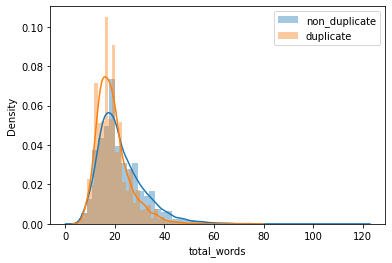

In [42]:
sns.distplot(new_df[new_df["is_duplicate"] == 0]['total_words'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'], label='duplicate')
plt.legend() 
plt.show()

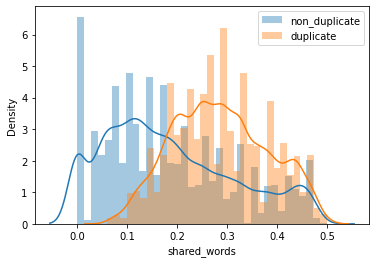

In [44]:
sns.distplot(new_df[new_df["is_duplicate"] == 0]['shared_words'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['shared_words'], label='duplicate')
plt.legend() 
plt.show()

In [45]:
ques_df = new_df[["question1","question2"]]
ques_df.head()

,question1,question2
62155,How do I get free WiFi on Android?,How can I get free wifi?
244172,How is the word 'licentious' used in sentences?,How is the word 'preserve' used in a sentence?
150717,What would happen if both Trump and Pence were...,If Trump and Pence are killed together before ...
247063,"Does Rogaine work, and if so, how quickly do y...",How well does Minoxidil (Rogaine) work?
229060,Do you think Facebook Workplace will be succes...,What will it take for Workplace by Facebook to...


In [46]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape) 
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,shared_words
62155,0,34,24,8,6,4,14,0.29
244172,0,47,46,8,9,6,17,0.35
150717,1,81,148,13,26,9,35,0.26
247063,0,61,39,12,6,2,18,0.11
229060,0,51,61,8,11,5,19,0.26


In [47]:
from sklearn.feature_extraction.text import CountVectorizer 
# merge texts 
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000) 
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [48]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index) 
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index) 
temp_df = pd.concat([temp_df1, temp_df2], axis=1) 
temp_df.shape

(30000, 6000)

In [49]:
final_df = pd.concat([final_df, temp_df], axis=1) 
print(final_df.shape) 
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,shared_words,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
62155,0,34,24,8,6,4,14,0.29,0,0,...,0,0,0,0,0,0,0,0,0,0
244172,0,47,46,8,9,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
150717,1,81,148,13,26,9,35,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
247063,0,61,39,12,6,2,18,0.11,0,0,...,0,0,0,0,0,0,0,0,0,0
229060,0,51,61,8,11,5,19,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test  = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=True) 

In [51]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
rf = RandomForestClassifier() 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7816666666666666

In [52]:
from xgboost import XGBClassifier 
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7773333333333333